In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


In [3]:
X=np.load("Datasets/Data/X.npy")
Y=np.load("Datasets/Data/Y.npy")
print(X.shape)     # train data has 2 parameters height and weight
print(Y.shape)

(100, 2)
(100,)


In [4]:
print(X)

[[11.563957    1.3389402 ]
 [10.06721983  4.08616331]
 [ 8.77253877  2.33030515]
 [10.12748869  5.32277484]
 [ 9.06439343  1.74115688]
 [ 7.88506245  1.50083021]
 [ 9.38860303 -1.41342865]
 [ 9.67284681 -0.20283165]
 [11.42846765  1.85948594]
 [ 8.24628674  3.12802959]
 [ 8.2434749   0.41644891]
 [ 7.77072231  3.86243349]
 [10.06393839  0.99078055]
 [10.50478434  1.18730514]
 [ 9.05251038  5.19142425]
 [ 8.69289001  1.54322016]
 [ 9.76566918  1.27689813]
 [ 9.86174537  6.02871838]
 [ 9.37370771  4.94611021]
 [ 8.7337095   2.49162431]
 [ 9.40806778  0.21238028]
 [ 8.18378052  1.29564214]
 [ 8.77572148 -0.59828407]
 [11.0329545  -0.16816717]
 [ 9.37814427  0.98057303]
 [10.85496409  5.85225779]
 [ 8.81982906  3.92571768]
 [ 9.38919979  1.13329119]
 [ 9.50048972 -0.26430318]
 [ 9.63773799 -0.01713182]
 [10.49459357  3.88766956]
 [11.48586652  4.72216659]
 [ 9.49232241  3.81547073]
 [ 8.68937095  1.48709629]
 [ 8.39622818  1.22550966]
 [ 9.48375428  3.96014003]
 [10.6124154   0.29700045]
 

In [5]:
print(Y)    # 1 for cat and 0 for dog

[0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0]


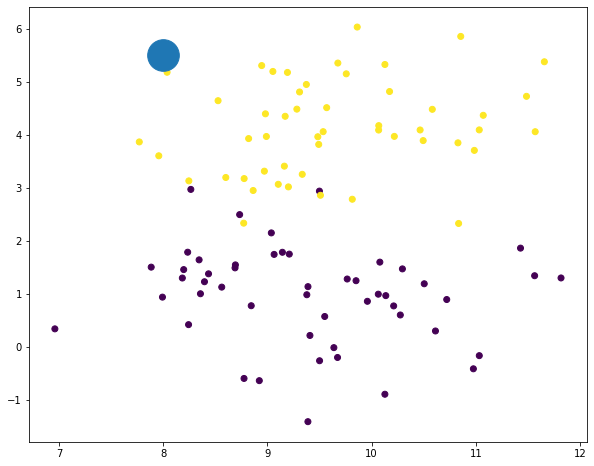

In [6]:
x=X[:,0]      # means take all rows and only first colmn
y=X[:,1]      # means take all rows and only 2nd colmn
plt.figure(figsize=(10,8))
plt.scatter(x,y,c=Y)  # c means color saare dogs ek color ke and saare cats ek color ke
plt.scatter(8,5.5,s=1000)    # s represents size of that particular point   
plt.show()

In [7]:
# now applying KNN algo
# here v1 and v2 are 2d coordinates
def dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [8]:
X.shape     # total 100 points

(100, 2)

In [9]:
def knn(X,Y,query_point,k=5):
    m=X.shape[0]             # n.o of points in training dataset 
    distances=[]             # calculate distance of all points with query point
    for i in range(m):           # for each point
        d=dist(query_point,X[i])
        distances.append((d,Y[i]))      # appending label too to be able to tell which distance is for dog and which is for cat
    
    distances=sorted(distances)[:k]      # take first k elements  , writing nothing onleft of semicolon means its 0 by default
    distances=np.array(distances)        # convert list to array so that we can apply np operations
    labels=distances[:,1]                #  select all rows and second colmn
    labels,freq=np.unique(labels,return_counts=True)    # return 2 arrays see below example
    pred=labels[np.argmax(freq)]                        # take the highest freq class 
    return pred

In [10]:
query=np.array([8,6.5])
knn(X,Y,query)

1.0

In [11]:
a=np.array([0,1,0,0,1])

In [12]:
np.unique(a,return_counts=True)        # 0 element freq =3 and 1 element freq =2
# here writing return_counts=True is necessary to return count of every unique element in a separate array
# see output , there will be two arrays           

(array([0, 1]), array([3, 2], dtype=int64))

# MNIST dataset


In [13]:
Train=pd.read_csv("Datasets/MNIST-1/train.csv").values
Test =pd.read_csv("Datasets/MNIST-1/test.csv").values

In [14]:
print(Train.shape)     # 19999 pics and each has 785 parameters , last 785th thing colmn isnt a parameter its the y values
print(Test.shape)   

(19999, 785)
(9999, 785)


In [15]:
X_train=Train[:,:-1]     # take all the cols except last one ,bcoz its the value y , proof -> in  Train[:,s:e] the col e isnt included
Y_train=Train[:,-1]      # we are taking the 785th colmn herre

X_test=Test[:,:-1]       
Y_test=Test[:,-1]


In [59]:
def visualize(img):
    # we plot an image of square or rectangle dimensions
    plt.imshow(img.reshape(28,28),cmap="gray")     # why reshape  , ans in copy , bcoz we can only plot square images so 
    plt.show()

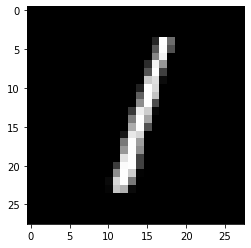

1.0

In [60]:
index=1
visualize(X_test[index])
knn(X_train,Y_train,X_test[index])    # predicts what number is written in the image

In [18]:
# plt.imshow(X_train[1].reshape) 
# plt.show()

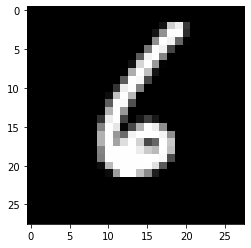

(784,)


In [120]:
visualize(X_train[2])
print(X_train[2].shape)
#visualize(X_test[30])

(28, 28, 3)


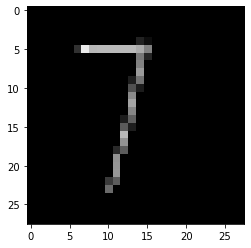

In [172]:
img=plt.imread("Datasets/paint1.png")    # how to use custom image i.e via paint 
plt.imshow(img)
print(img.shape)
plt.show()


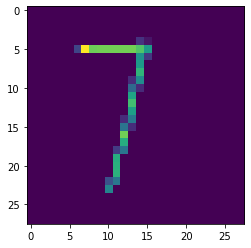

In [173]:

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#(thresh,img) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img)

(28, 28)


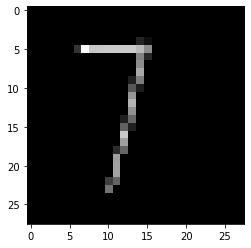

In [174]:
#plt.imshow(img)
plt.imshow(img,cmap="gray")
print(img.shape) 

In [175]:
img=img.reshape((784,))
print(img.shape)

(784,)


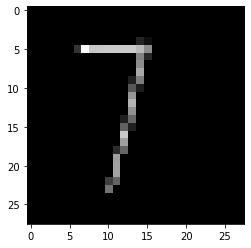

1.0

 

ACTUAL MATRIX 


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

In [176]:
visualize(img)
print(knn(X_train,Y_train,img))
print("\n \n")
print("ACTUAL MATRIX \n\n")
print(img)
img=img*255                         # DONT RUN THIS CELL MULTIPLE TIMES IR ELSE MULTIPLE MULRIPLICATIONS WILL HAPPEN
print("\n \n")
print("MODIFIED MATRIX \n\n")
print(img)

#print(X_test[3])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 169 253 253 253 253
 253 253 218  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  52 250 253 210  32
  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31  18
   0   0   0   0 209 253 253  65   0   0   0   0   

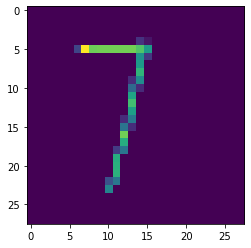

In [177]:
plt.imshow(img.reshape(28,28))
print(X_test[0])

print(img)
img=img.astype(int)
print(img)

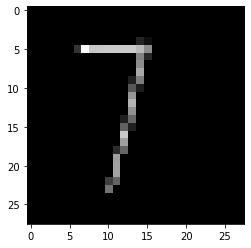

1.0

In [178]:
visualize(img)
knn(X_train,Y_train,img)